<a href="https://colab.research.google.com/github/sparsh-ai/notebooks/blob/main/Optimization_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization and Gradient Descent

## Imports

In [ ]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning
import keras.layers as L             # for easy NN layer access

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

Visualizing gradient descent. Sampled values and functions were manually discovered and tuned.

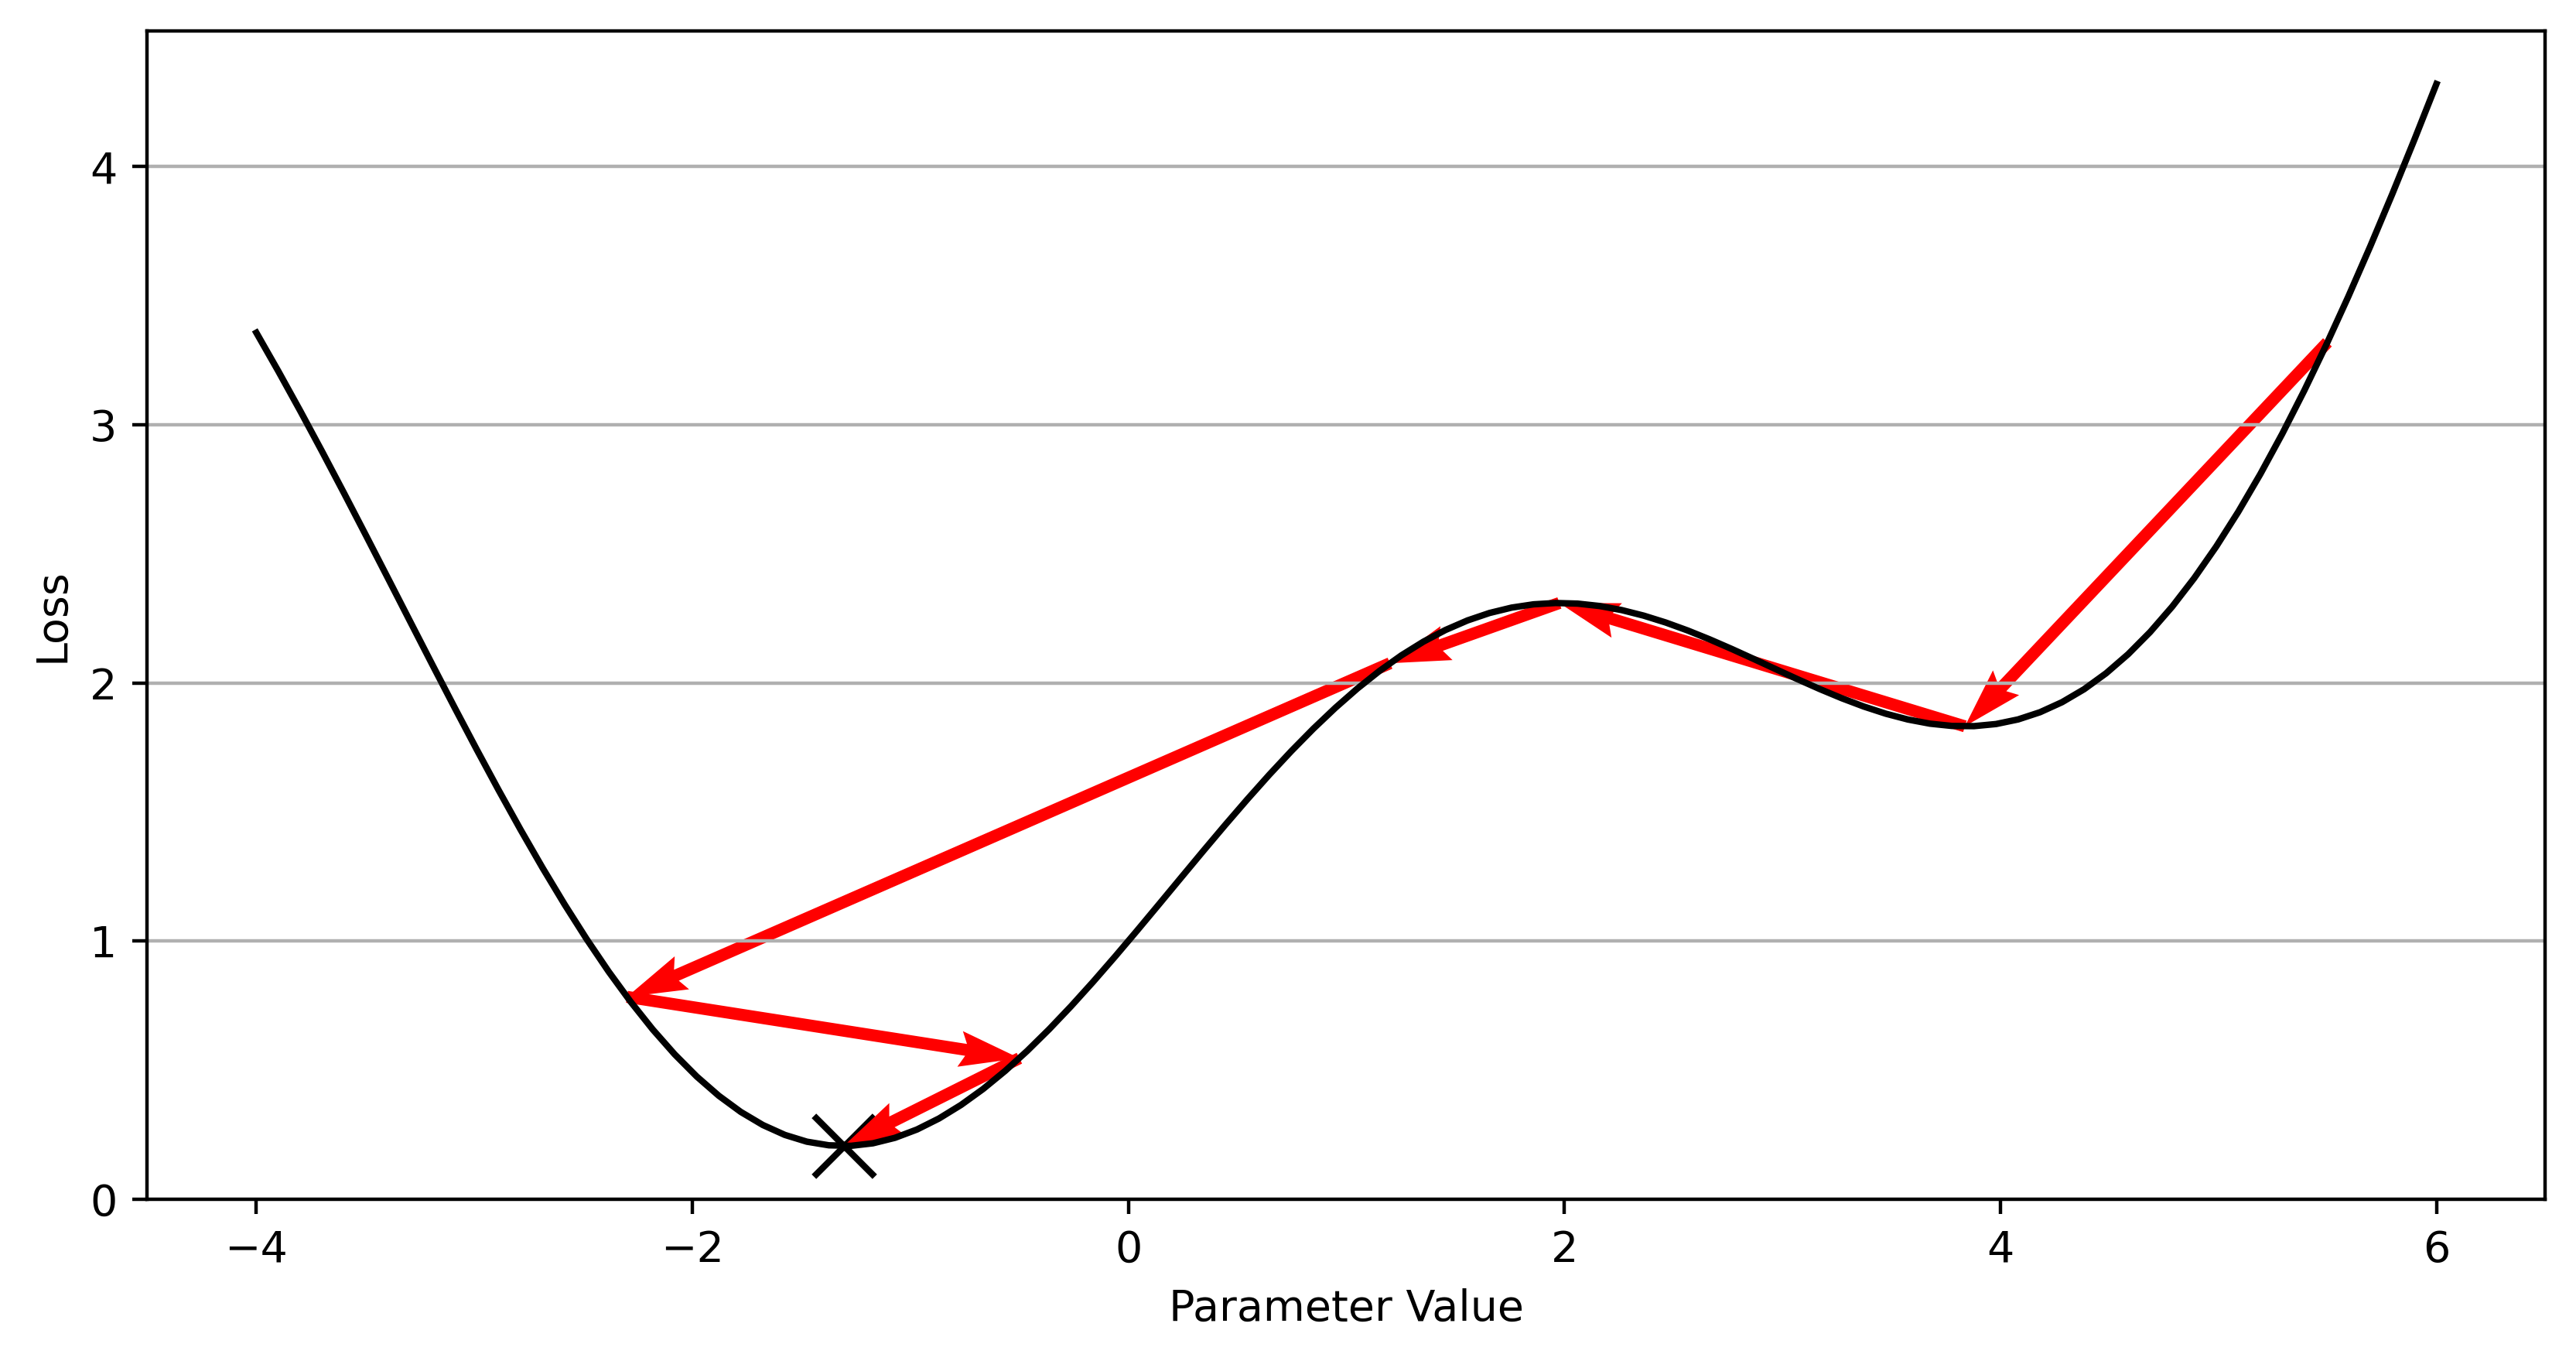

In [ ]:
features = np.linspace(-4, 6, 100)
targets = np.sin(features) + features**2/10 + 1

f = lambda x:np.sin(x) + x**2/10 + 1

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

plt.scatter([-1.306], [0.205], color='black', marker='x', s=200)
x = np.array([5.5, 3.837, 1.977, 1.2, -2.3, -0.5, -1.306])
axes.quiver(x[:-1], 
          f(x)[:-1], 
          ([x[i+1]-x[i] for i in range(len(x[:-1]))]), 
          ([f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]), 
          angles='xy', 
          scale_units='xy', 
          scale=1,
          linestyle='--',
          width=0.005,
          color='red')

plt.plot(features, targets, color='black')

plt.ylabel('Loss')
plt.xlabel('Parameter Value')

plt.show()

Let's plot various gradient descent minimizations for the function $\sin x + \frac{x^2}{10} + 1$.

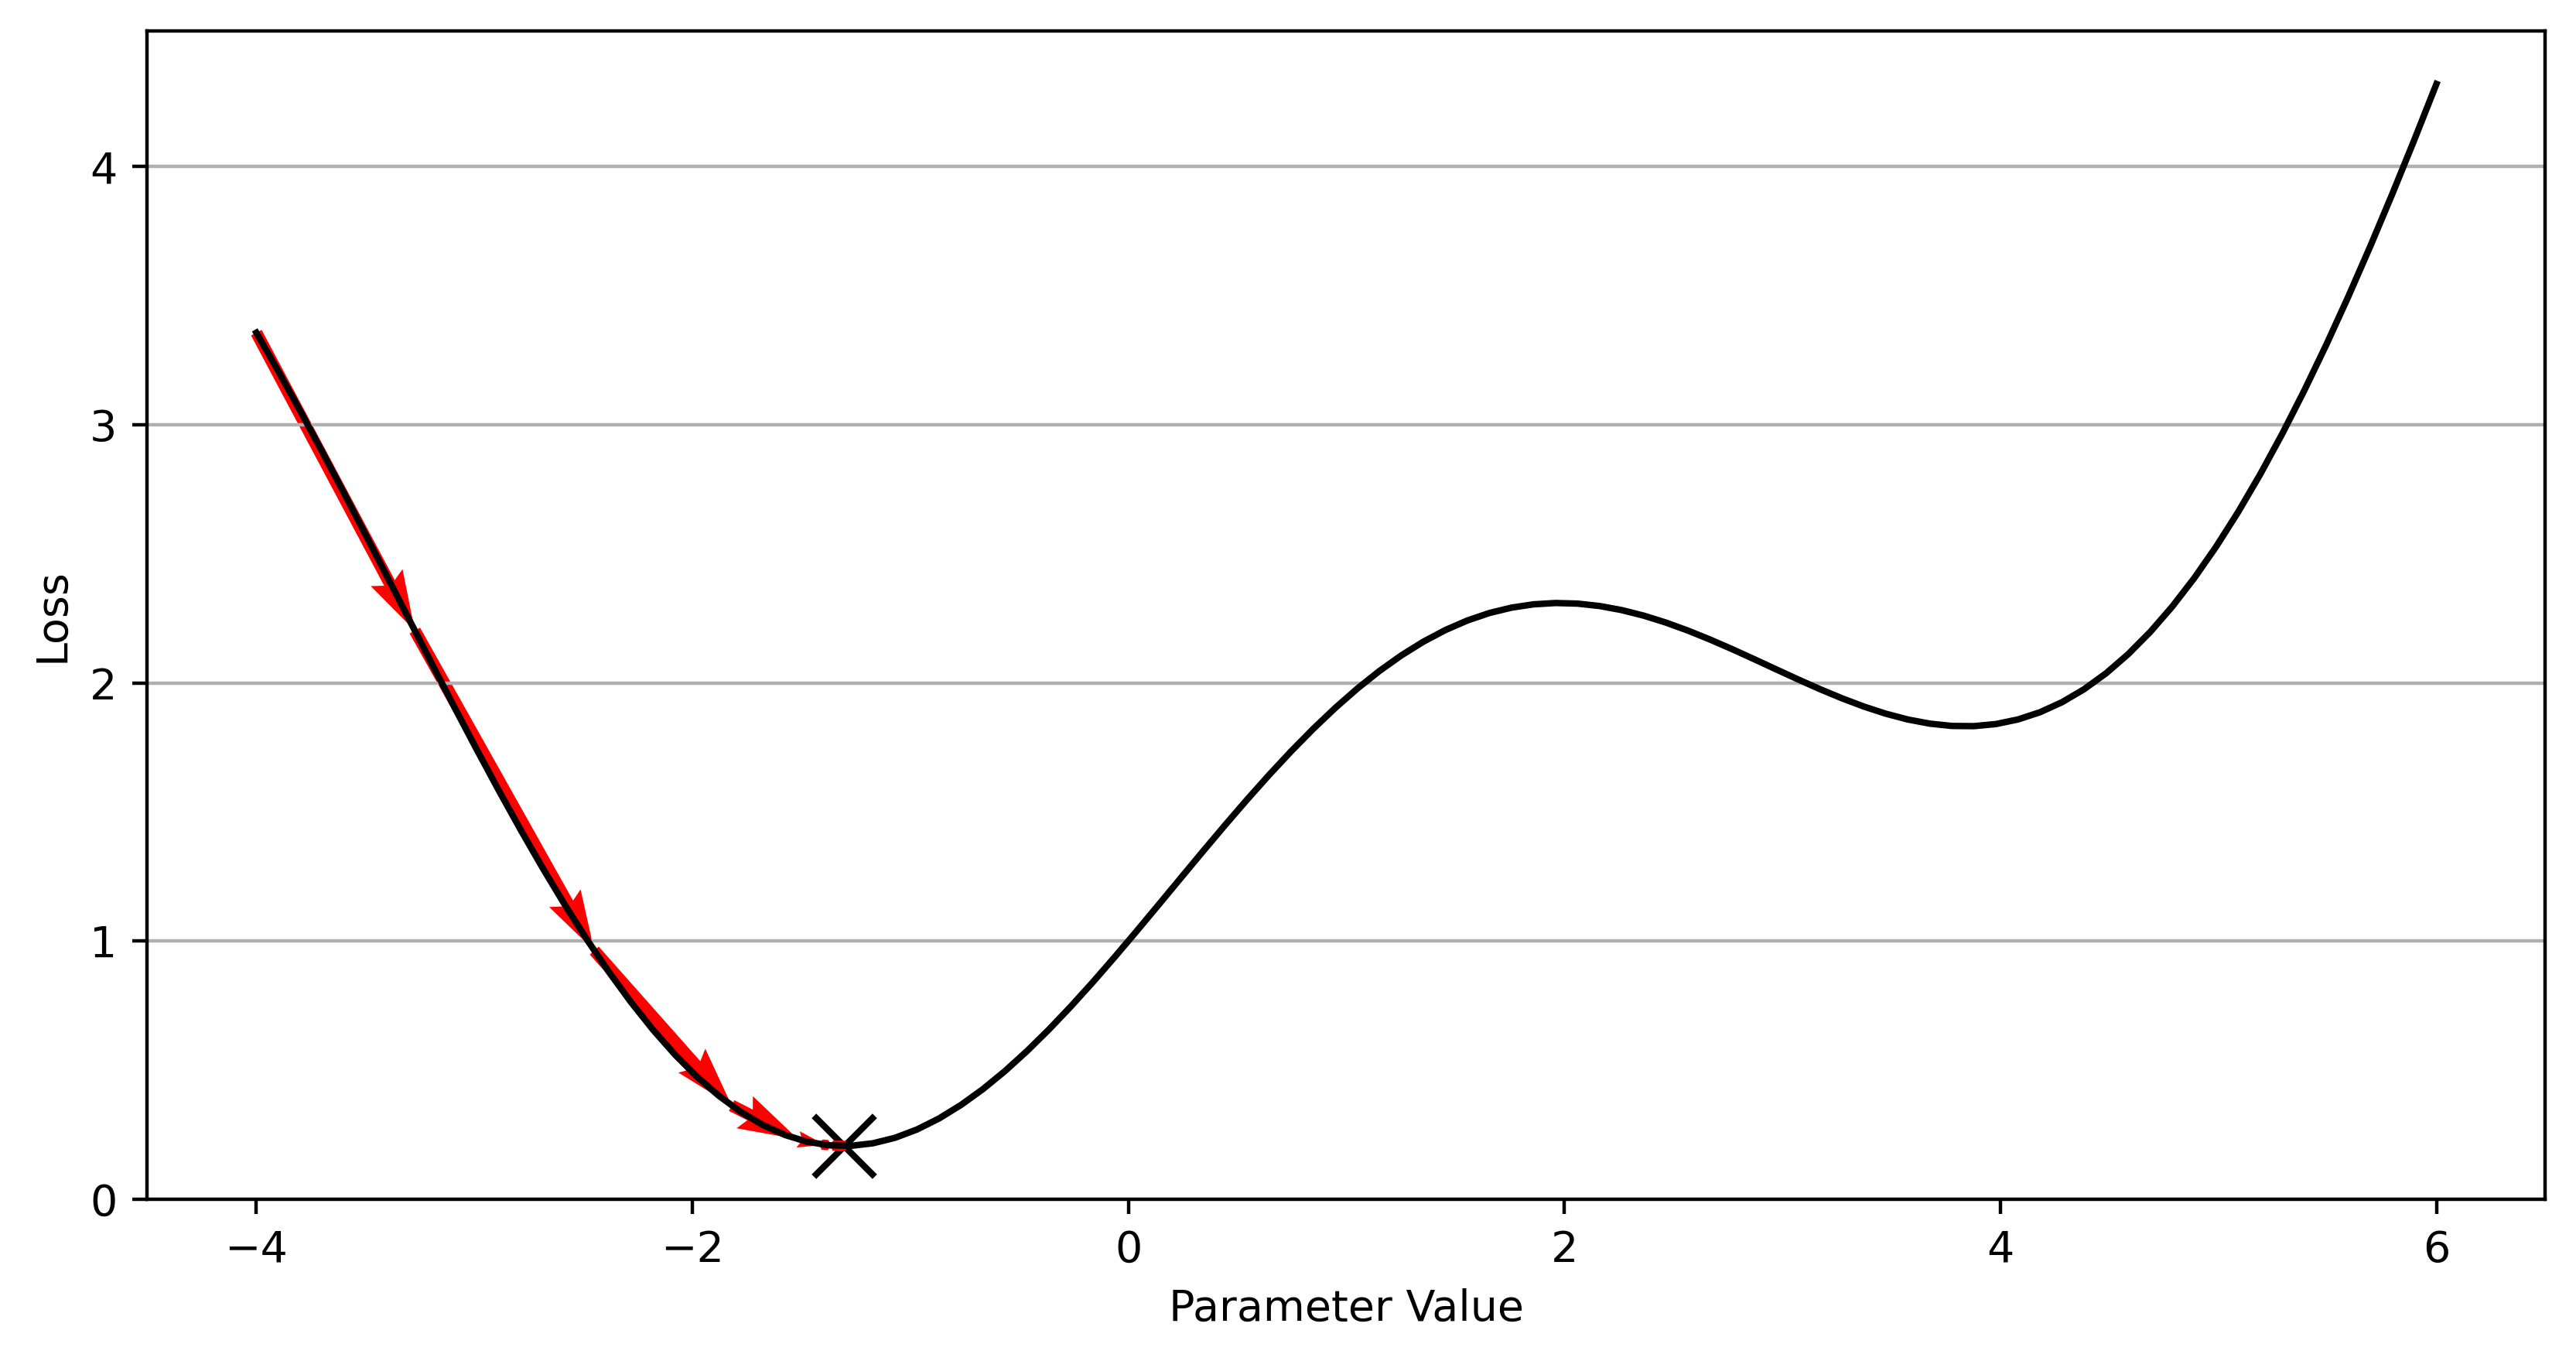

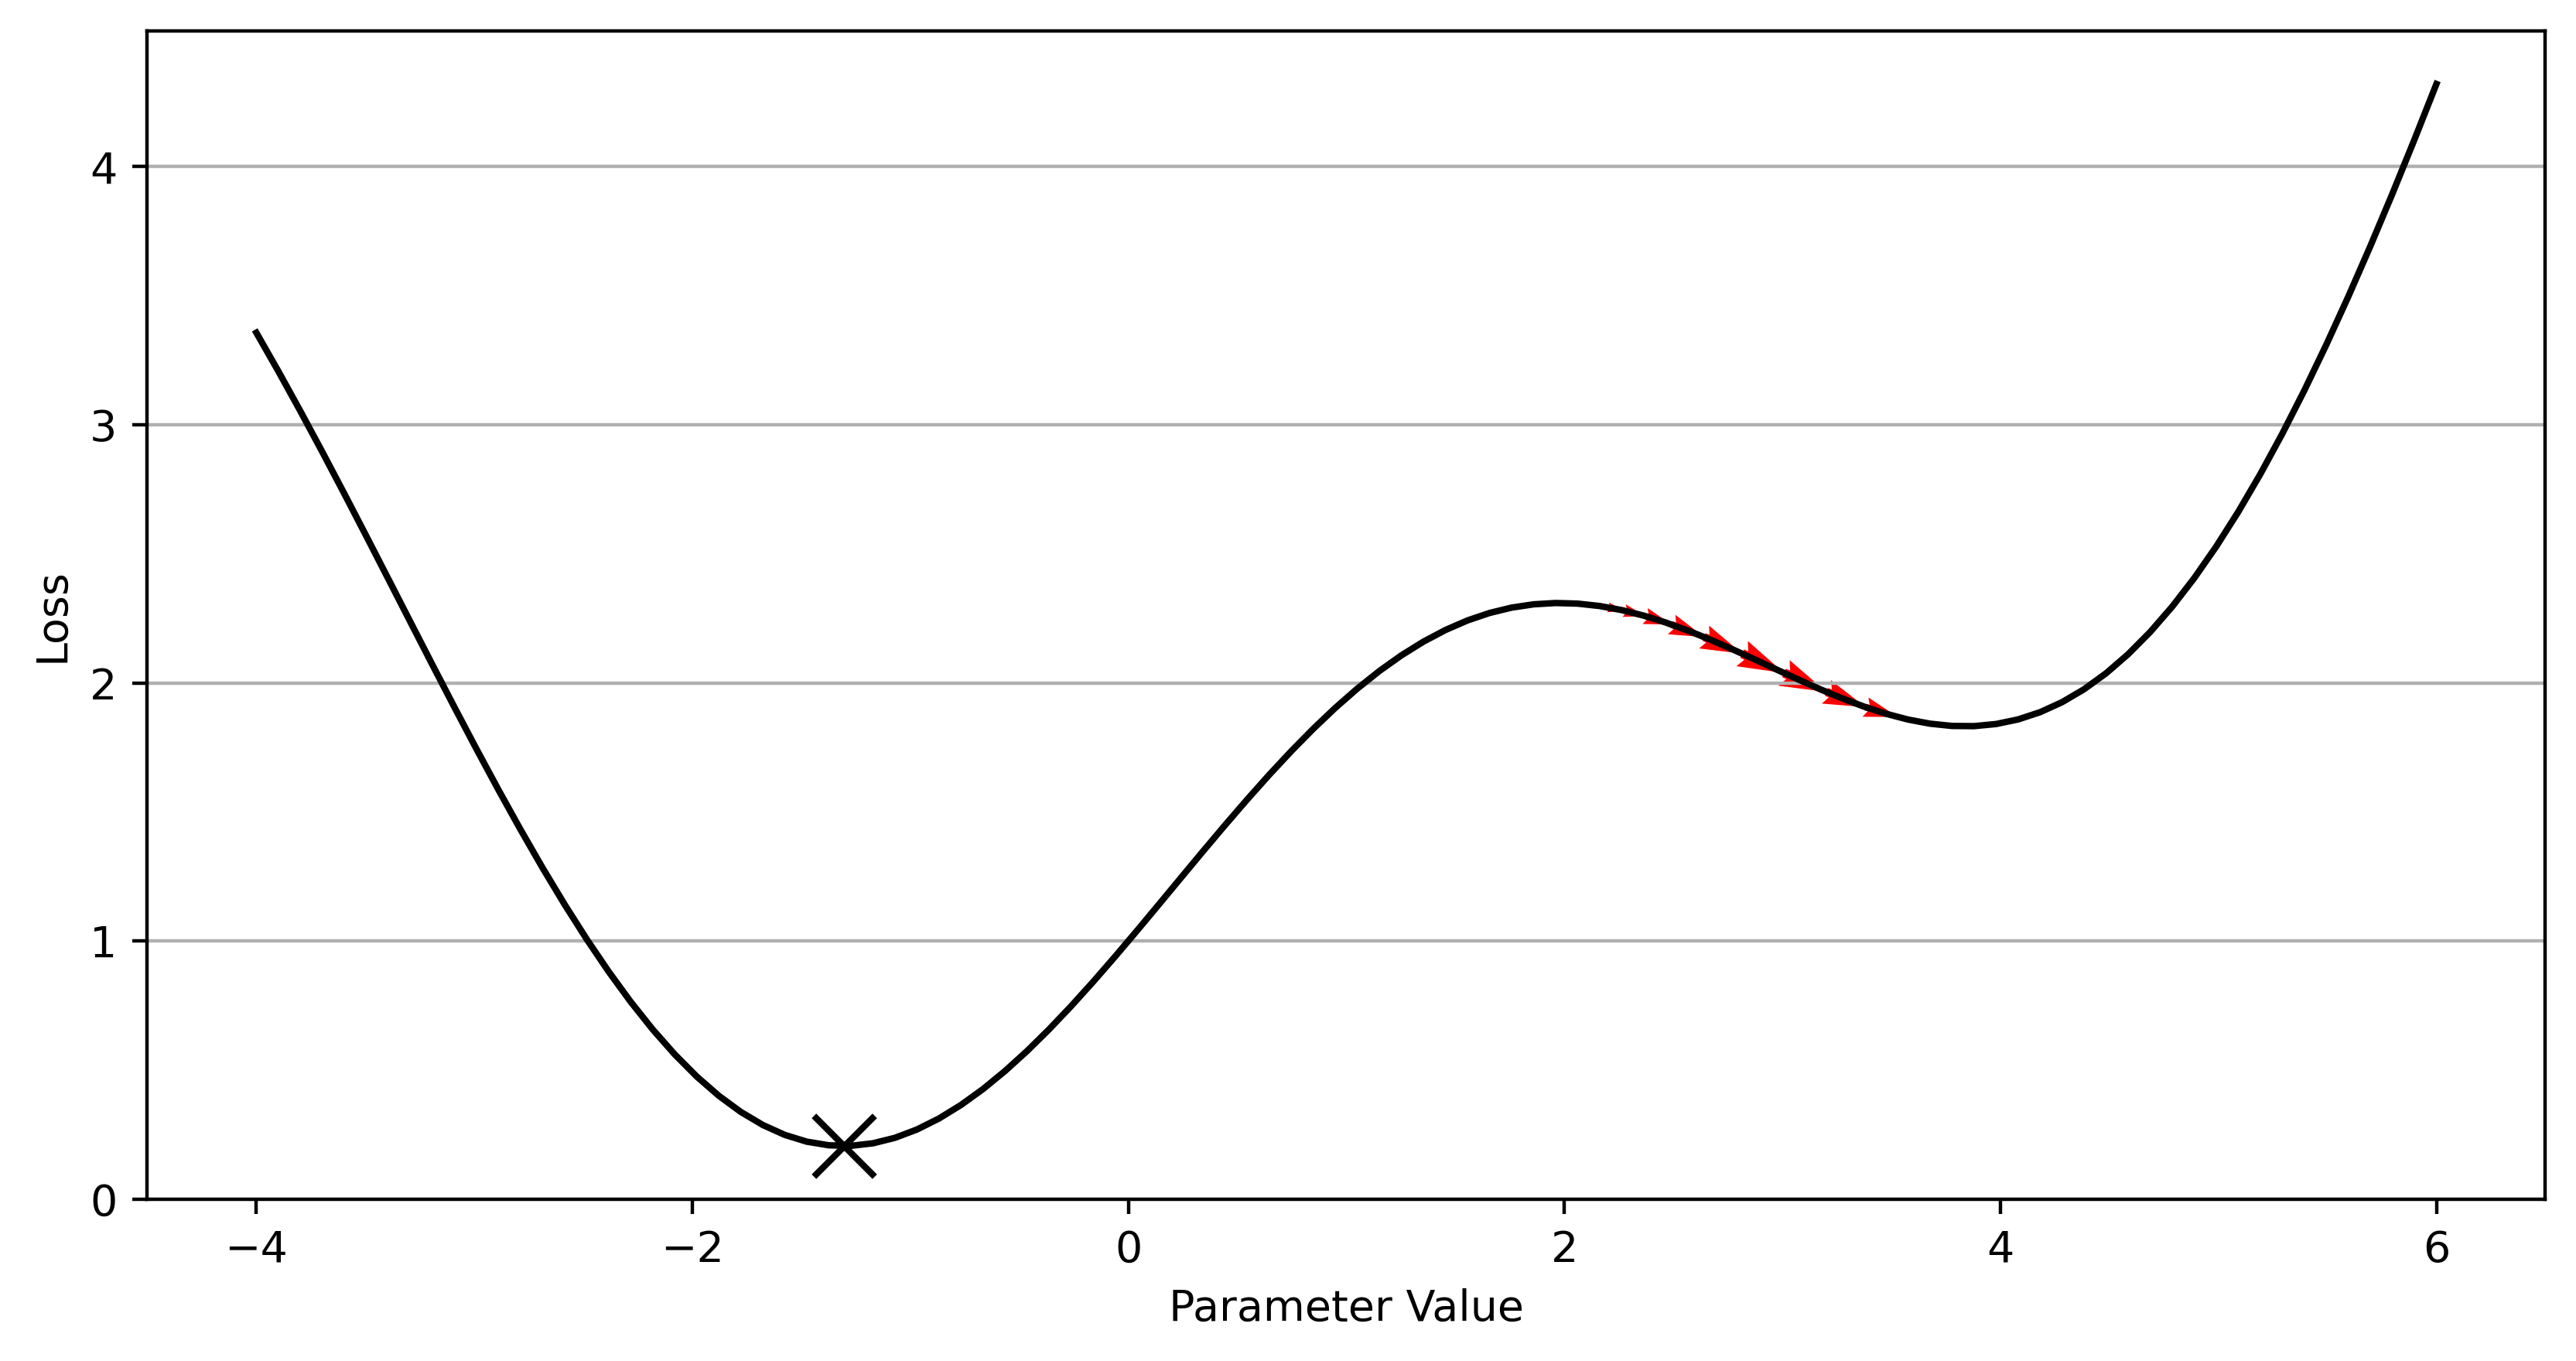

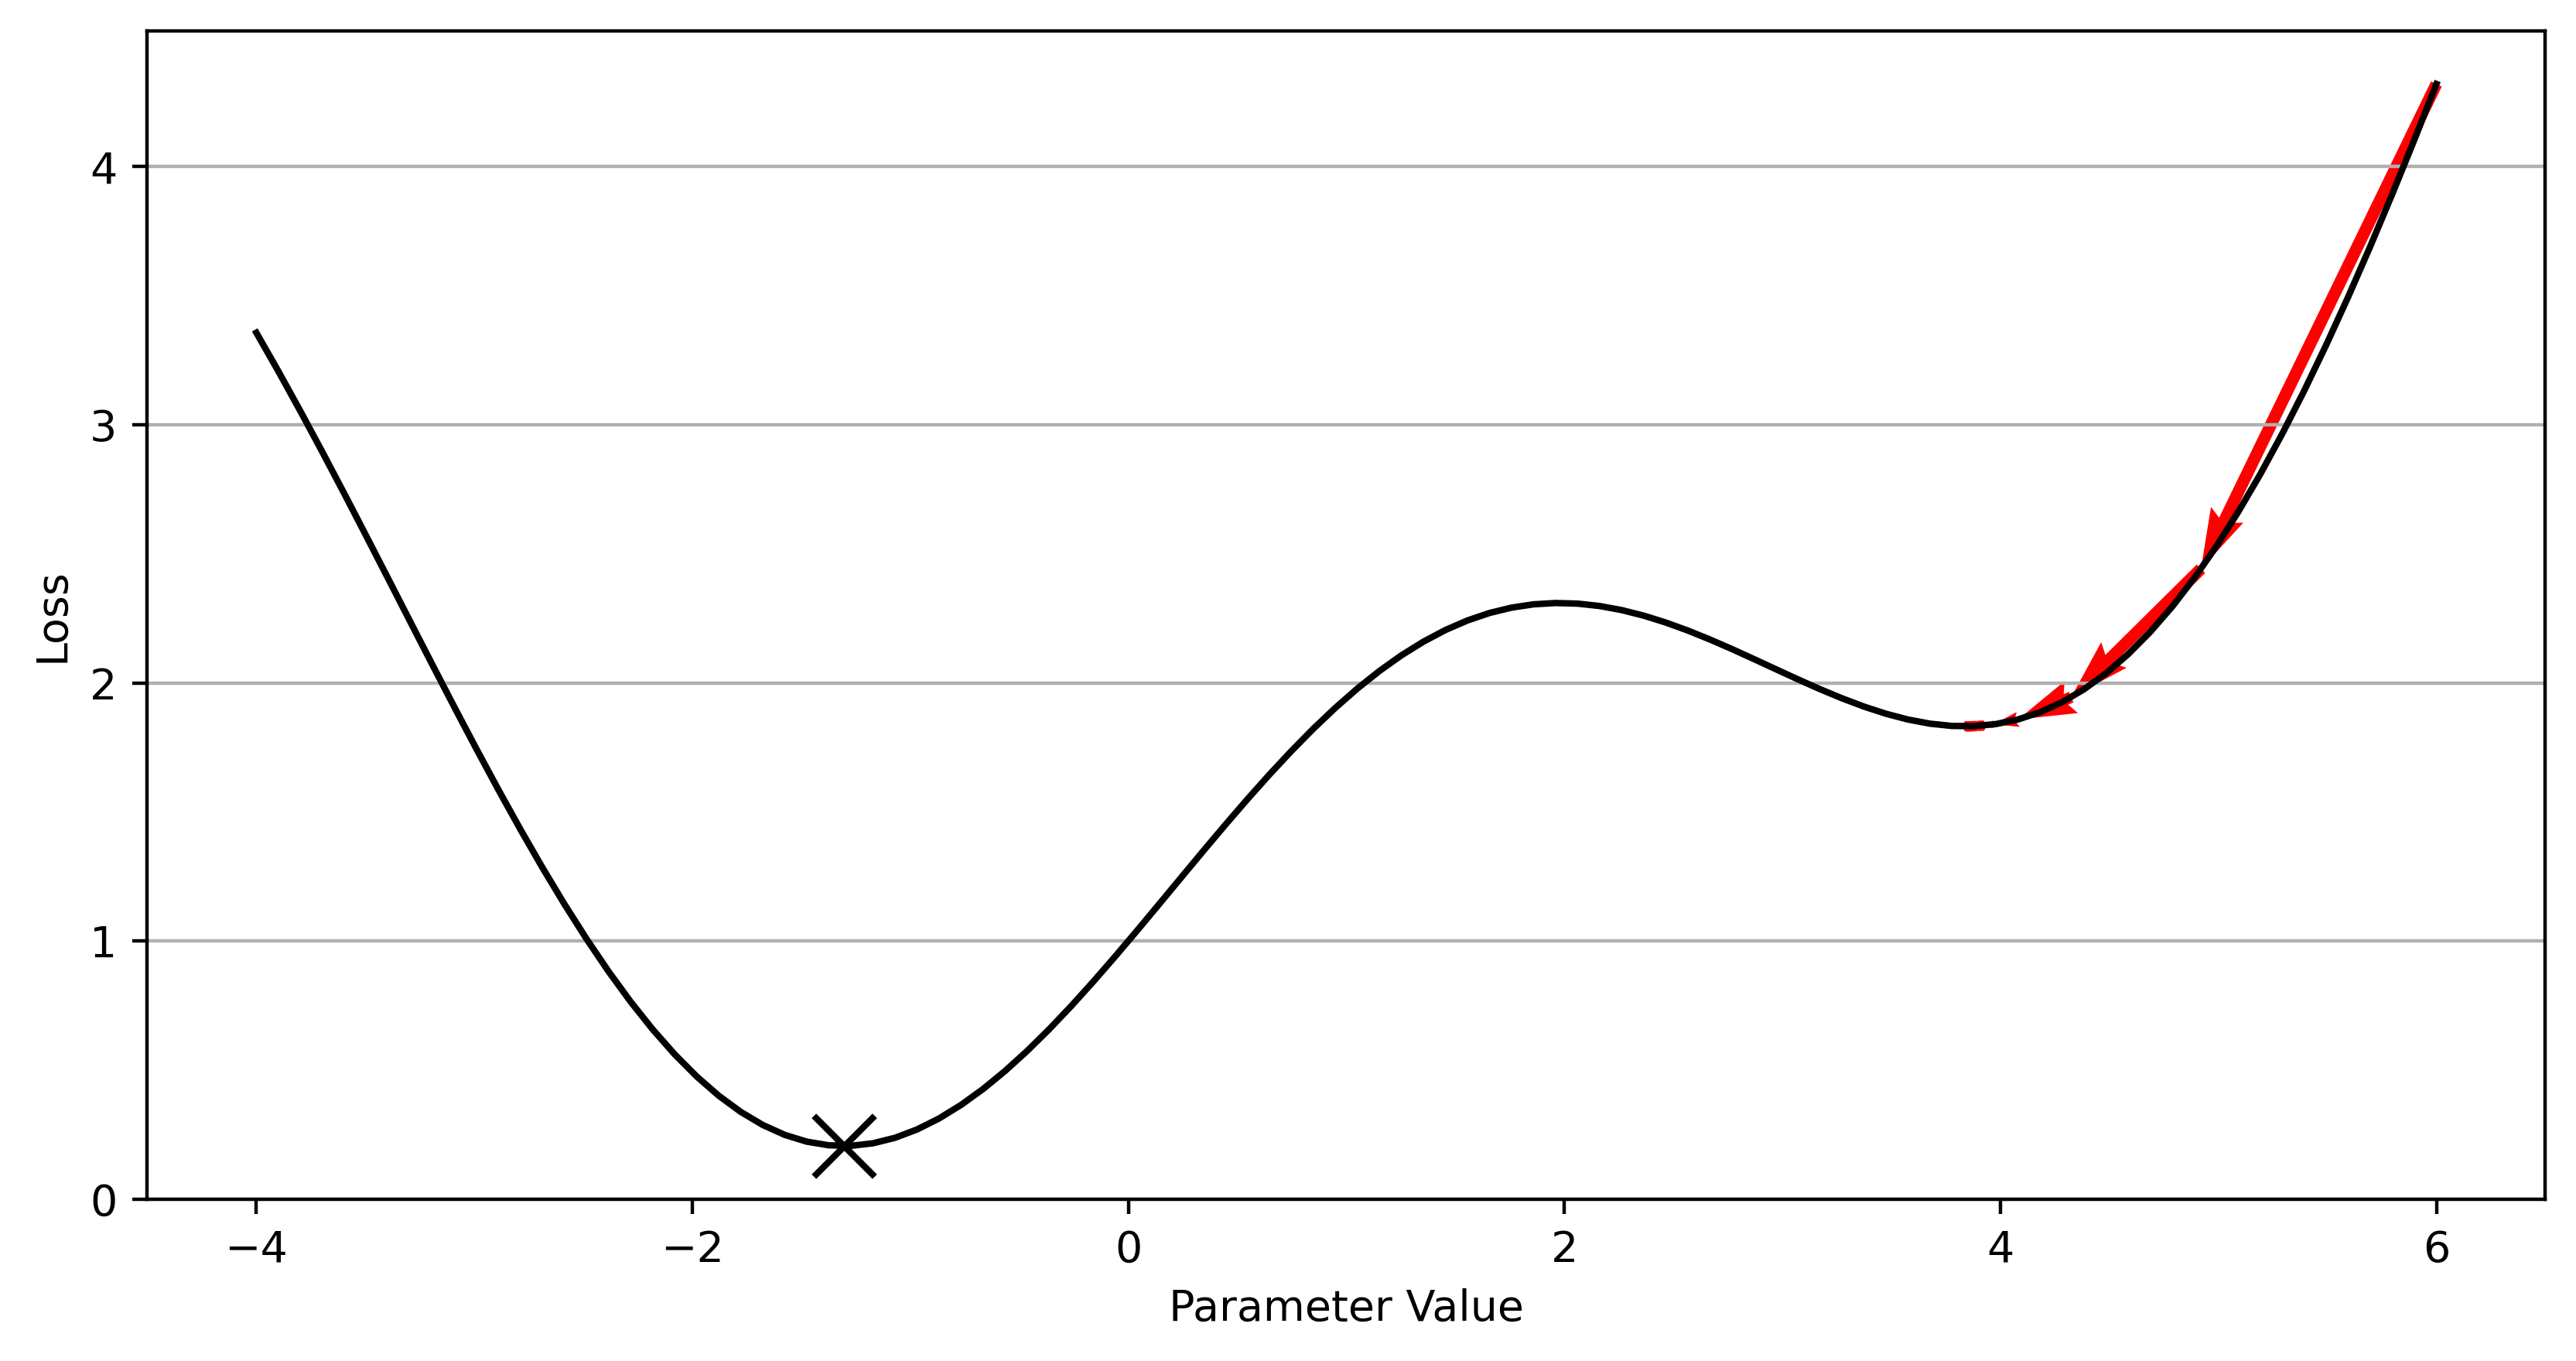

In [ ]:
def plot_gd_min(learn_rate = 0.5, curr_x = 6):

    cost = lambda x: np.sin(x) + x**2 / 10 + 1
    gradient = lambda x: np.cos(x) + 2*x / 10

    x = []
    for iteration in range(10):
        x.append(curr_x)
        curr_x += -learn_rate * gradient(curr_x)

    features = np.linspace(-4, 6, 100)
    targets = np.sin(features) + features**2/10 + 1

    f = lambda x:np.sin(x) + x**2/10 + 1

    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    plt.scatter([-1.306], [0.205], color='black', marker='x', s=200)
    x = np.array(x)
    axes.quiver(x[:-1], 
              f(x)[:-1], 
              ([x[i+1]-x[i] for i in range(len(x[:-1]))]), 
              ([f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]), 
              angles='xy', 
              scale_units='xy', 
              scale=1,
              linestyle='--',
              width=0.005,
              color='red')

    plt.plot(features, targets, color='black')

    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()

plot_gd_min(learn_rate = 0.5, curr_x = -4)
plot_gd_min(learn_rate = 0.5, curr_x = 2.2)
plot_gd_min(learn_rate = 0.5, curr_x = 6)

Plotting a simple linear regression fitting example with gradient descent.

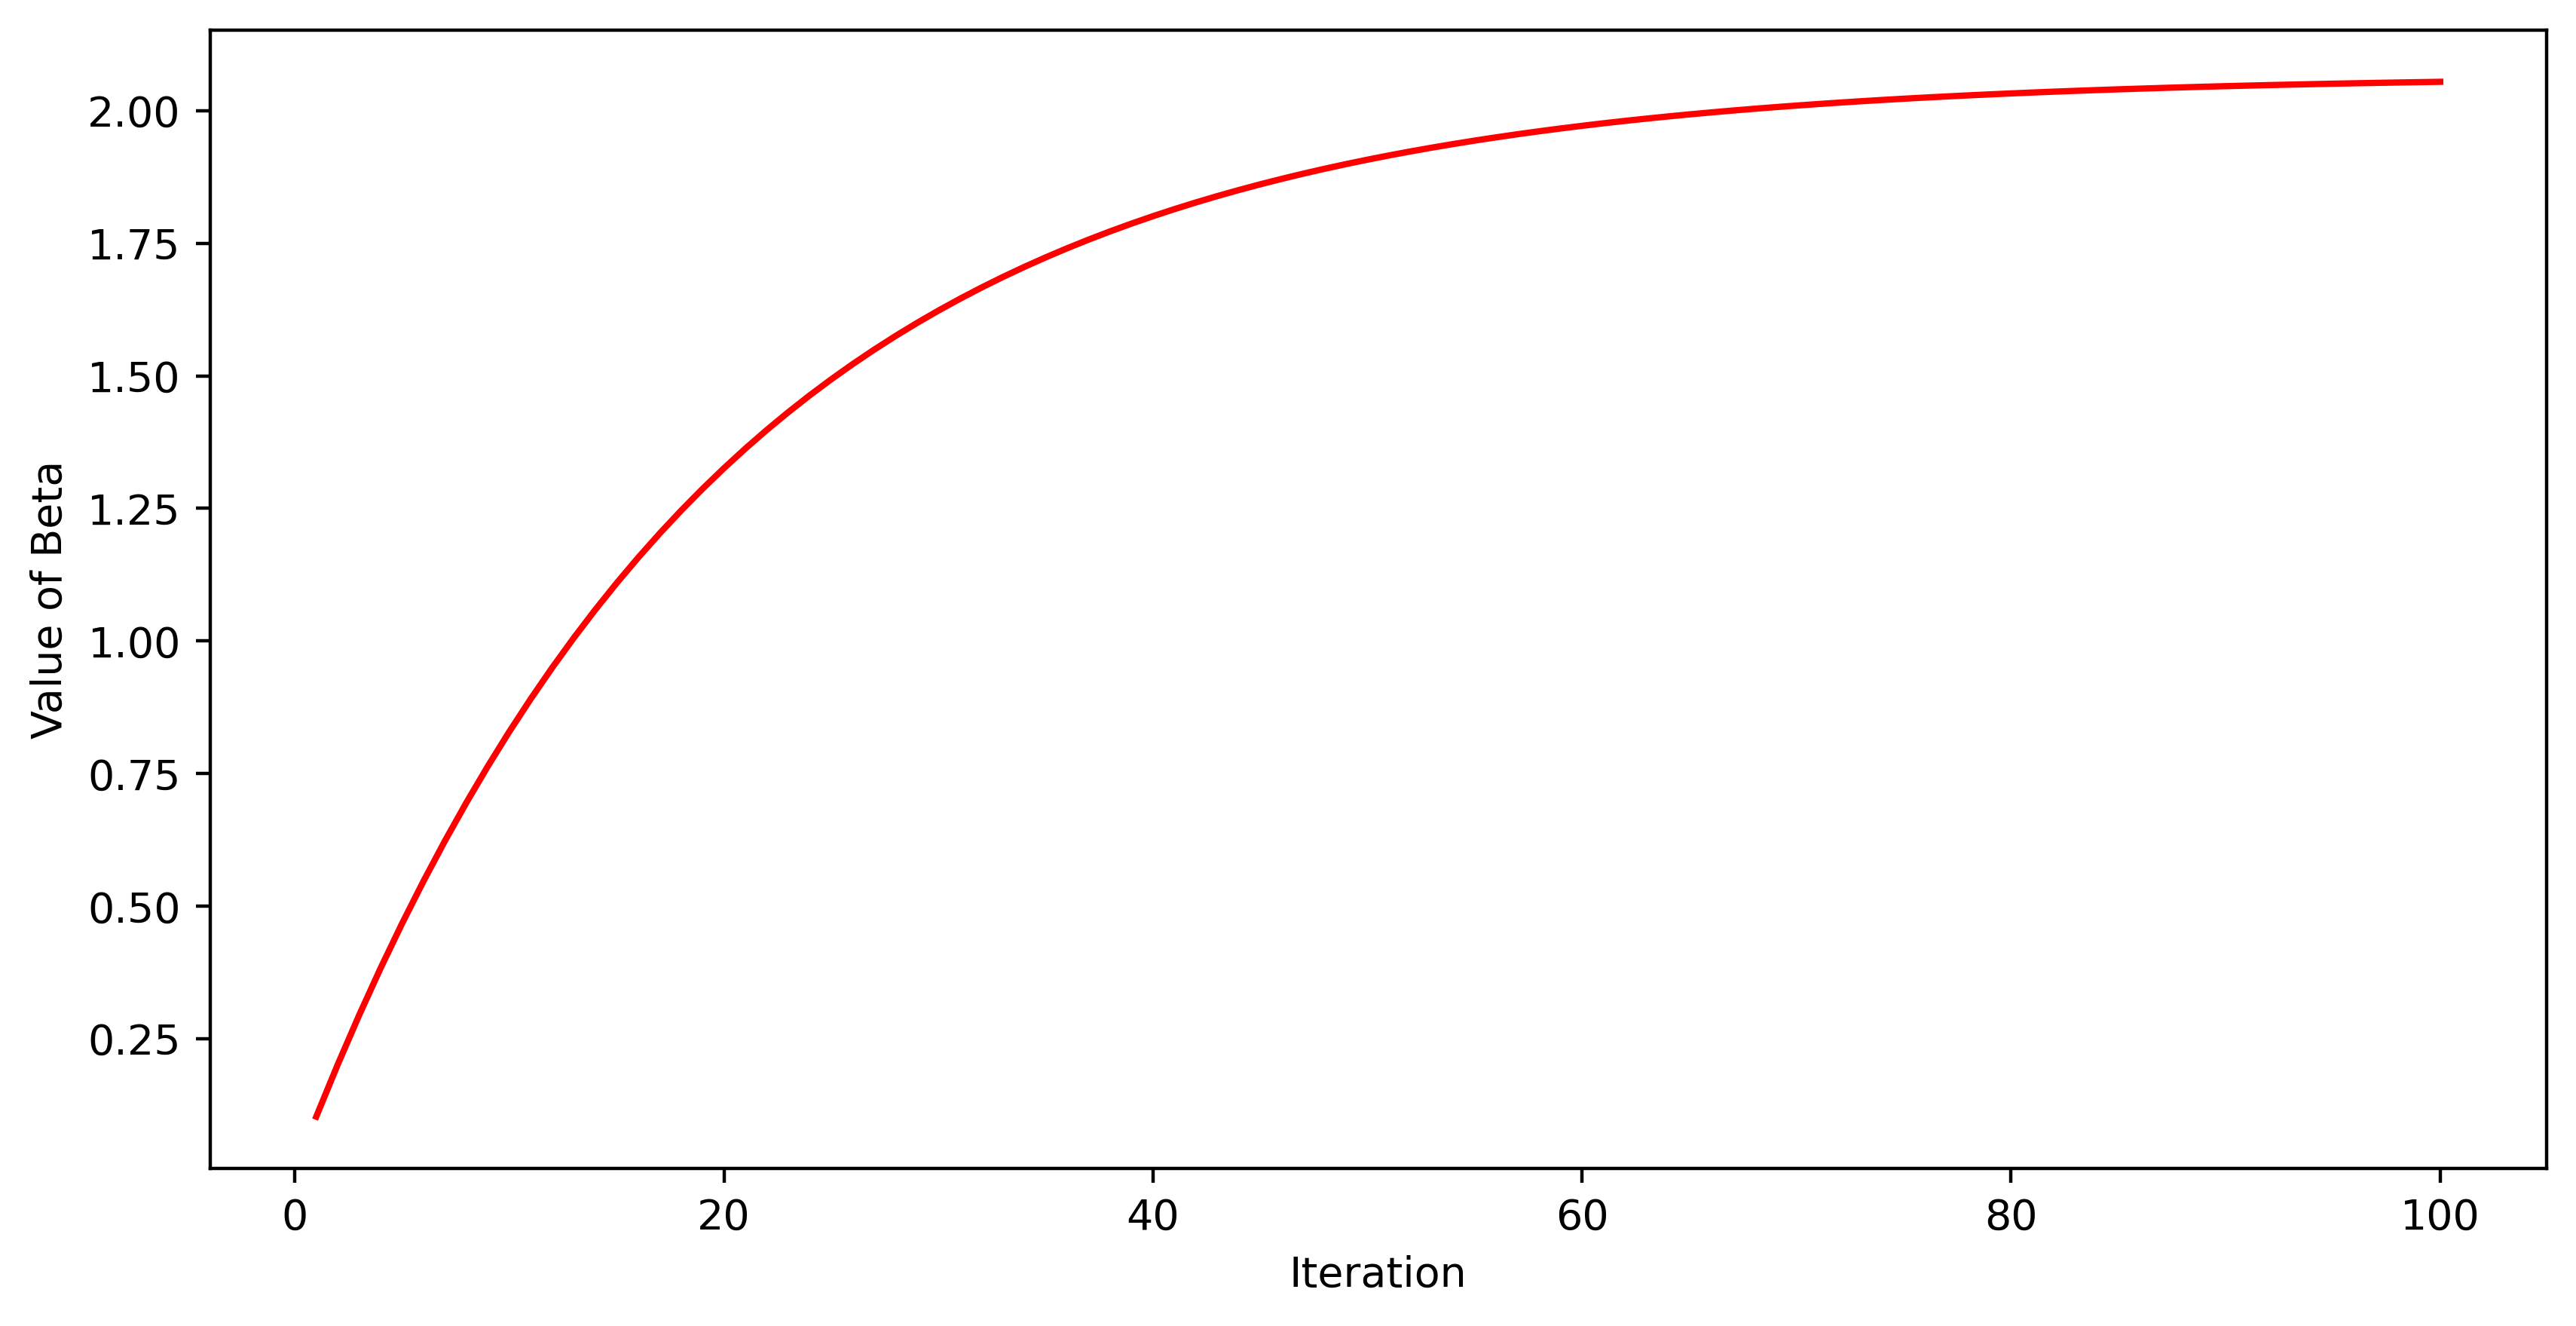

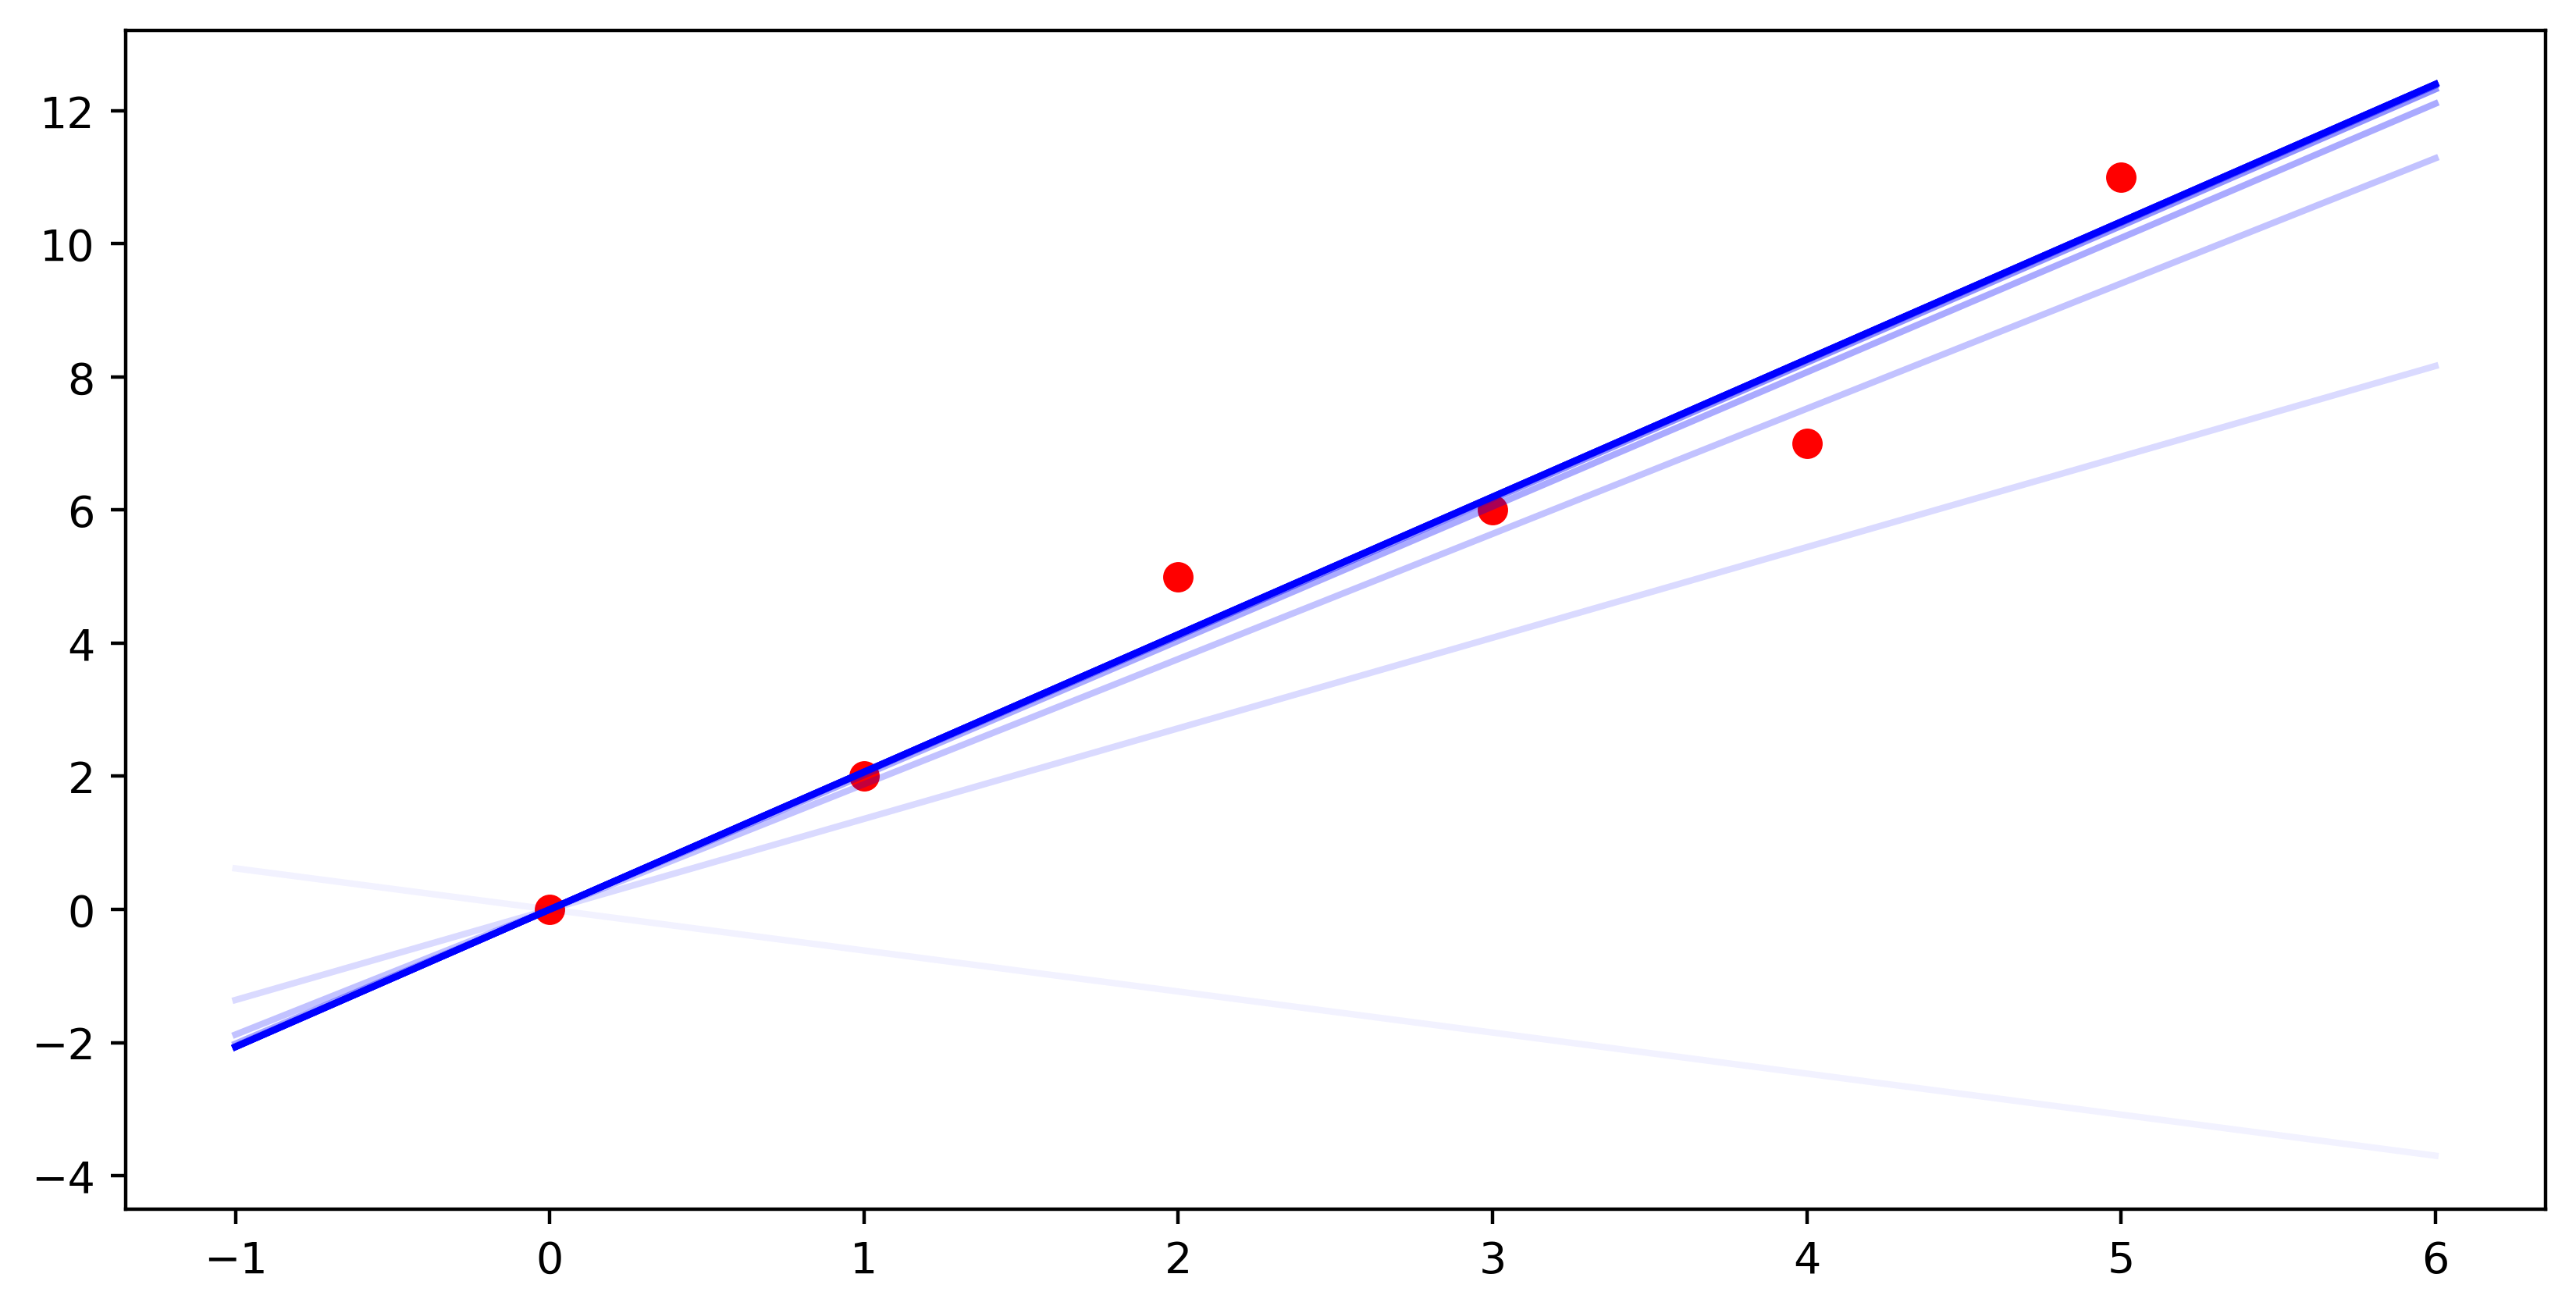

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 5, 6, 7, 11])

def predict(beta, x):
    return beta * x

def gradient(beta, x, y):
    errors = predict(beta, x) - y
    return np.mean(errors)

# plot value of beta over time
learn_rate = 0.02
curr_beta = 0
history = []

for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, x, y)
    history.append(curr_beta)

plt.figure(figsize=(10, 5), dpi=400)
plt.plot(np.arange(1, 101), history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Value of Beta')
plt.show()

# plot how line changes across iterations
# (plot every 10 iterations with increasing boldness)
learn_rate = 0.05
curr_beta = -1

plt.figure(figsize=(10, 5), dpi=400)

for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, x, y)
    
    if iteration % 10 == 0:
        px = np.linspace(-1, 6, 100)
        py = curr_beta * px
        plt.plot(px, py, alpha=1 - (1 - iteration/100) * 0.95, color='blue')

plt.scatter(x, y, color='red')

plt.show()

---